In [1]:
import numpy as np
import pandas as pd
import cv2
import mediapipe as mp
from PIL import Image
import warnings
import time
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False,max_num_hands=2,min_detection_confidence=0.5)

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [2]:
paths = []
cat = []

path1 = 'Sign-Language-Digits-Dataset-master/Dataset/'

for i in os.listdir(path1):
    path2 = path1 + i + '/'
    for j in os.listdir(path2):
        path3 = path2 +  j
        paths.append(path3)
        cat.append(i)

In [3]:
paths[0]

'Sign-Language-Digits-Dataset-master/Dataset/0/IMG_1118.JPG'

In [4]:
df = pd.DataFrame([])
df['paths'] = paths
df['cat'] = cat
df.head()

,paths,cat
0,Sign-Language-Digits-Dataset-master/Dataset/0/...,0
1,Sign-Language-Digits-Dataset-master/Dataset/0/...,0
2,Sign-Language-Digits-Dataset-master/Dataset/0/...,0
3,Sign-Language-Digits-Dataset-master/Dataset/0/...,0
4,Sign-Language-Digits-Dataset-master/Dataset/0/...,0


In [5]:
df.shape

(2062, 2)

In [6]:
df.isnull().sum().sum()

0

In [40]:
def get_x_y(image):
    image = np.array(image).squeeze().astype(np.uint8)
    x_y = []
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            for landmark in hand_landmarks.landmark:
                x = float(landmark.x * image.shape[1])
                y = float(landmark.y * image.shape[0])
                x_y.append(x)
                x_y.append(y)
                if len(x_y)>=(21*2):
                    break
            break
    return x_y

In [41]:
x_y = []
for i,path in enumerate(df.paths):
    image = cv2.imread(path)
    x_y.append(get_x_y(image))
    if i%200 == 0:
        print(i)

0
200
400
600
800
1000
1200
1400
1600
1800
2000


In [9]:
len(x_y)

2062

In [42]:
df2 = pd.DataFrame(x_y)
df2['cat'] = [int(i) for i in cat]

In [43]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,cat
0,60.258842,60.067773,50.450188,60.087812,44.393954,53.818685,39.834005,46.800876,37.263429,41.101778,...,36.581647,58.969092,33.241946,51.468939,24.460950,45.609537,29.685414,44.517994,36.232677,0
1,52.128100,67.667019,58.241397,57.265806,58.810806,44.372463,61.129123,35.327256,60.301405,26.866227,...,24.404177,40.061870,43.361127,43.440586,27.744901,51.131016,23.653562,55.442214,25.124198,0
2,54.445529,81.516099,60.392880,63.317293,57.927614,49.702826,58.154690,39.177284,58.375996,30.351037,...,26.893157,44.341660,50.814241,47.390133,32.168192,53.786910,26.921341,58.256495,26.947659,0
3,47.273743,83.688843,58.359176,66.002929,59.503227,49.103305,63.460582,37.039465,65.250695,27.705401,...,24.013452,42.347330,46.002588,49.513558,23.622493,59.263396,21.354675,64.919305,25.885066,0
4,32.262629,82.385939,50.024617,64.571226,59.354234,49.609244,68.235677,40.092883,72.841859,32.333577,...,32.623309,35.665235,43.430328,49.613902,31.685278,60.642344,32.203776,67.399776,34.643734,0


In [44]:
df2.isnull().sum().sum()

0

In [45]:
X = df2.drop('cat',axis=1)
y = df2['cat'].values


In [46]:
mean = X.mean()
_max = X.max()
_min = X.min()

X2 = (X - mean) / (_max - _min)

In [50]:
xtrain , xtest , ytrain , ytest = train_test_split(X,y , test_size=0.25, random_state=42)

In [51]:
model = RandomForestClassifier(random_state=42)
model.fit(xtrain , ytrain)

RandomForestClassifier(random_state=42)

In [52]:
score = model.score(xtest,ytest)
round(score*100,2)

98.06

In [63]:
from sklearn.metrics import (confusion_matrix , accuracy_score , precision_score, 
                             recall_score, f1_score , classification_report )
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
ypred = model.predict(xtest)

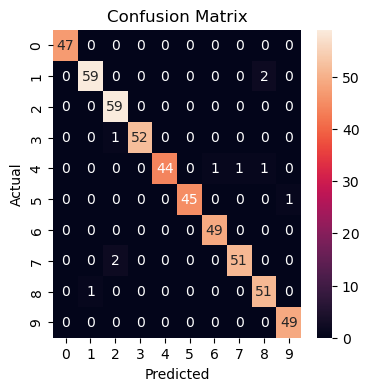

In [67]:
cm = confusion_matrix(ypred,ytest)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True)#, fmt='d', cmap='Blues', annot_kws={"size": 16}

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [70]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.98      0.97      0.98        61
           2       0.95      1.00      0.98        59
           3       1.00      0.98      0.99        53
           4       1.00      0.94      0.97        47
           5       1.00      0.98      0.99        46
           6       0.98      1.00      0.99        49
           7       0.98      0.96      0.97        53
           8       0.94      0.98      0.96        52
           9       0.98      1.00      0.99        49

    accuracy                           0.98       516
   macro avg       0.98      0.98      0.98       516
weighted avg       0.98      0.98      0.98       516



In [75]:
f'{round(accuracy_score(ypred,ytest)*100,3)}%'

'98.062%'

In [68]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)

Cross-Validation Scores: [0.95883777 0.97578692 0.99271845 0.96359223 0.96601942]
